In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
import nltk
nltk.download('vader_lexicon')
plt.style.use("ggplot")

[nltk_data] Downloading package vader_lexicon to C:\Users\Fast
[nltk_data]     Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [81]:
df = pd.read_csv("flipkart_product.csv")
df = df.reset_index().rename(columns={"index":"Id"})
df = df.head(500)

In [82]:
df.head()

,Id,ProductName,Price,Rate,Review,Summary
0,0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"ƒ??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"ƒ??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"ƒ??3,999",3,Fair,The quality is good but the power of air is de...
3,3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"ƒ??3,999",1,Useless product,Very bad product it's a only a fan
4,4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"ƒ??3,999",3,Fair,Ok ok product


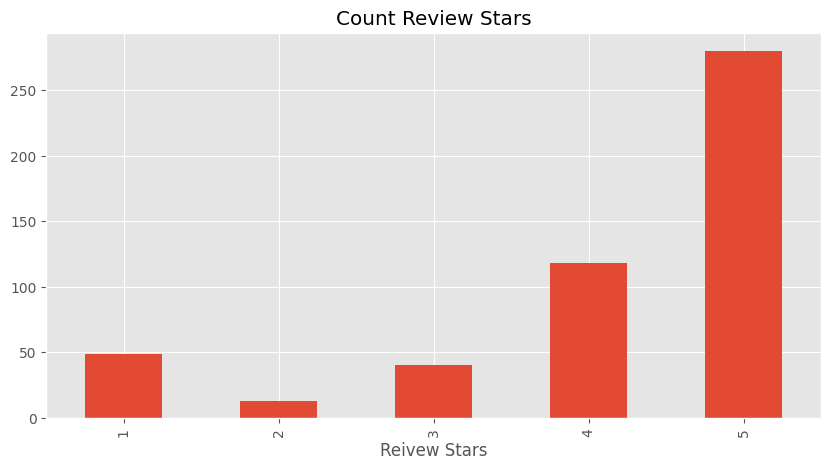

In [29]:
ax = df["Rate"].value_counts().sort_index().plot(kind="bar", title="Count Review Stars", figsize=(10, 5))
ax.set_xlabel("Reivew Stars")
plt.show()

In [38]:
example = df["Summary"][50]
print(example)

Average cooling not much as expected by size and reviews of cooler... cooling is sufficient Maharaja whiteline should work on its cooling efficiency and reduce size by width can increase in height to maintain tank capacity.


In [43]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Average',
 'cooling',
 'not',
 'much',
 'as',
 'expected',
 'by',
 'size',
 'and',
 'reviews']

In [47]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Average', 'JJ'),
 ('cooling', 'VBG'),
 ('not', 'RB'),
 ('much', 'RB'),
 ('as', 'IN'),
 ('expected', 'VBN'),
 ('by', 'IN'),
 ('size', 'NN'),
 ('and', 'CC'),
 ('reviews', 'NNS')]

In [52]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Average/JJ
  cooling/VBG
  not/RB
  much/RB
  as/IN
  expected/VBN
  by/IN
  size/NN
  and/CC
  reviews/NNS
  of/IN
  cooler/NN
  .../:
  cooling/NN
  is/VBZ
  sufficient/JJ
  Maharaja/NNP
  whiteline/NN
  should/MD
  work/VB
  on/IN
  its/PRP$
  cooling/NN
  efficiency/NN
  and/CC
  reduce/VB
  size/NN
  by/IN
  width/NN
  can/MD
  increase/VB
  in/IN
  height/JJ
  to/TO
  maintain/VB
  tank/JJ
  capacity/NN
  ./.)


In [57]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [61]:
sia.polarity_scores("I am very Happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [63]:
sia.polarity_scores("This is the worst thing ever.")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [64]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.5859}

In [83]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row["Summary"]
    res[i] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [85]:
vadors = pd.DataFrame(res).T
vadors = vadors.reset_index().rename(columns={"index":"Id"})
vadors = vadors.merge(df)

In [86]:
vadors.head()

,Id,neg,neu,pos,compound,ProductName,Price,Rate,Review,Summary
0,0,0.000,0.430,0.570,0.9597,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"ƒ??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,1,0.000,0.240,0.760,0.8591,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"ƒ??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,2,0.000,0.837,0.163,0.2382,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"ƒ??3,999",3,Fair,The quality is good but the power of air is de...
3,3,0.376,0.396,0.228,-0.3597,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"ƒ??3,999",1,Useless product,Very bad product it's a only a fan
4,4,0.000,0.185,0.815,0.5267,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"ƒ??3,999",3,Fair,Ok ok product


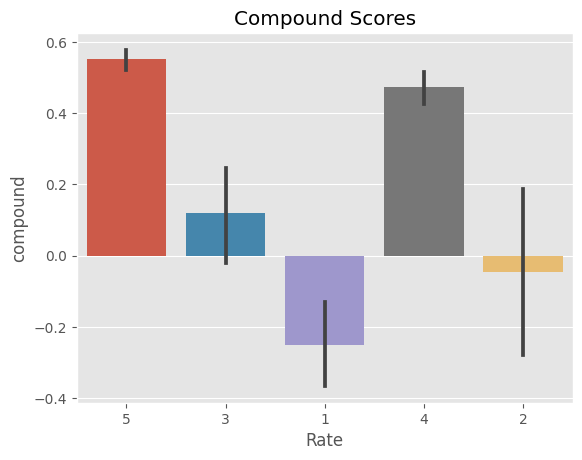

In [87]:
ax = sns.barplot(data=vadors, x="Rate", y="compound")
ax.set_title("Compound Scores")
plt.show()